In [27]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from statsmodels.tsa.arima.model import ARIMA # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from datetime import timedelta 

# Loading

In [28]:
# Load your data
data = pd.read_excel("C:/Users/asfaa/Downloads/Data Analyst _ Sample Data _HDM.xlsx")  # Replace with your actual data file path

# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24623 entries, 0 to 24622
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     24623 non-null  int64         
 1   Lead Id                     24623 non-null  int64         
 2   Campaign ID                 24623 non-null  int64         
 3   Advertiser Id               24623 non-null  int64         
 4   Hid                         24623 non-null  object        
 5   Call Status                 24623 non-null  object        
 6   Lead Status                 24623 non-null  object        
 7   Agent Duration(seconds)     24623 non-null  int64         
 8   Customer Duration(seconds)  24623 non-null  int64         
 9   From Calling Number         24500 non-null  float64       
 10  To Calling Number           24617 non-null  float64       
 11  Attempt No                  24623 non-null  int64     

## Preprocessing

In [29]:
call_status = data['Call Status'].unique()
call_status

array(['no-answer', 'completed', 'failed', 'in-progress'], dtype=object)

In [30]:
call_status_ids = data[data['Call Status']=='completed']['Call Id'].count()
call_status_ids

8454

In [31]:
lead_status = data['Lead Status'].unique()
print(lead_status)

advertiser_criteria = ['Already Verified', 'Interested', 'Already Bought', 'Already Buy/ Bought']

['Not Interested' 'Invalid Number' 'Busy' 'No Answer'
 'Bought Another Product' 'Already Verified' 'Interested' 'Call Back'
 'Already Bought' 'Not Reachable' 'Language Barrier' 'Voice Issue'
 'Not Eligible - Income' 'Hung-up' 'Not Eligible - Age' 'Ringing'
 'Already Buy/ Bought' 'Out of Geo Location' 'Opt Out' 'Failed'
 'Duplicate' 'Status26']


In [32]:
lead_status_ids = data[data['Lead Status']=='Interested']['Call Id'].nunique()
lead_status_ids

3451

In [33]:
campaign_ids = data['Campaign ID'].nunique()
campaign_ids

18

In [34]:
Qualified_Leads = data[['Lead Id','Lead Status']] #in advertiser_criteria

for stat in Qualified_Leads['Lead Status']:
    if stat in advertiser_criteria:
        Qualified_Leads['Lead Status'] = Qualified_Leads['Lead Status'].replace(stat, 1)
    else:
        Qualified_Leads['Lead Status'] = Qualified_Leads['Lead Status'].replace(stat, 0)

C:\Users\asfaa\AppData\Local\Temp\ipykernel_26220\921323701.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qualified_Leads['Lead Status'] = Qualified_Leads['Lead Status'].replace(stat, 0)
C:\Users\asfaa\AppData\Local\Temp\ipykernel_26220\921323701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qualified_Leads['Lead Status'] = Qualified_Leads['Lead Status'].replace(stat, 1)


In [35]:
Qualified_Leads[Qualified_Leads['Lead Status']==1]['Lead Id'].nunique()

1804

# Reports

## Campaign Performance Report

In [36]:
def campaign_performance_report(data):
    performance_report = {}
    performance_report['Total Calls'] = data['Call Id'].nunique()
    performance_report['Unique Leads'] = data['Lead Id'].nunique()
    performance_report['Calls Connected'] = data[data['Call Status']=='completed']['Call Id'].count()
    performance_report['Unique Calls Connected'] = data[data['Call Status']=='completed']['Call Id'].nunique()
    
    performance_report['Qualified Leads'] = Qualified_Leads[Qualified_Leads['Lead Status']==1]['Lead Id'].nunique()
    
    performance_report['Leads Converted'] = data[data['Lead Status']=='Interested']['Lead Id'].count()
    performance_report['Leads Lost'] = data[data['Lead Status']=='Not Interested']['Lead Id'].count()
    performance_report['Avg Agent Call Duration'] = data['Agent Duration(seconds)'].mean()
    performance_report['Avg Customer Call Duration'] = data['Customer Duration(seconds)'].mean()
    
    
    return performance_report


performance_report = campaign_performance_report(data)
print(performance_report)


{'Total Calls': 24623, 'Unique Leads': 8278, 'Calls Connected': 8454, 'Unique Calls Connected': 8454, 'Qualified Leads': 1804, 'Leads Converted': 3451, 'Leads Lost': 4916, 'Avg Agent Call Duration': 35.93843154773992, 'Avg Customer Call Duration': 12.986679121146896}


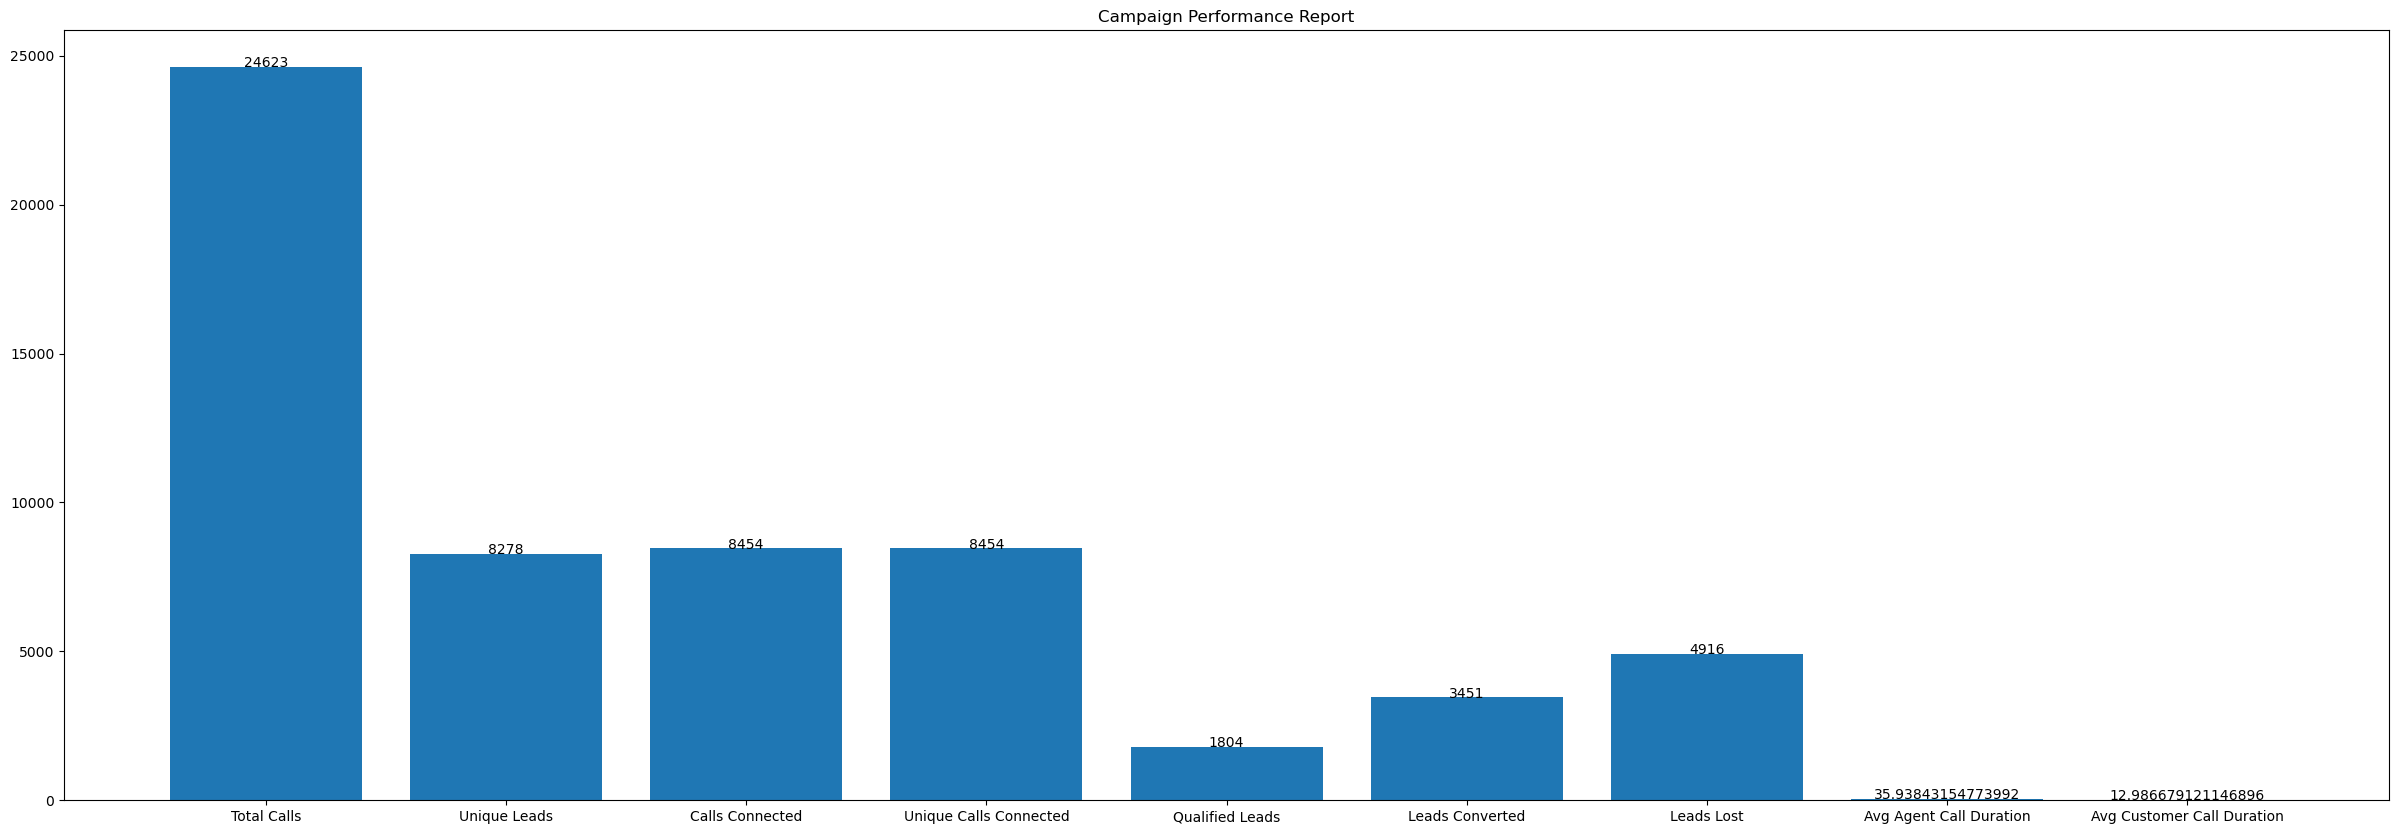

In [37]:
plt.figure(figsize=(30,10))
plt.title('Campaign Performance Report')
plt.bar(performance_report.keys(), performance_report.values())
for key, value in performance_report.items():
    plt.text(key, value, str(value), ha='center')
plt.show()

## Lead Disposition Report

Call Status
no-answer      65.150469
completed      34.333753
in-progress     0.345206
failed          0.170572
Name: proportion, dtype: float64


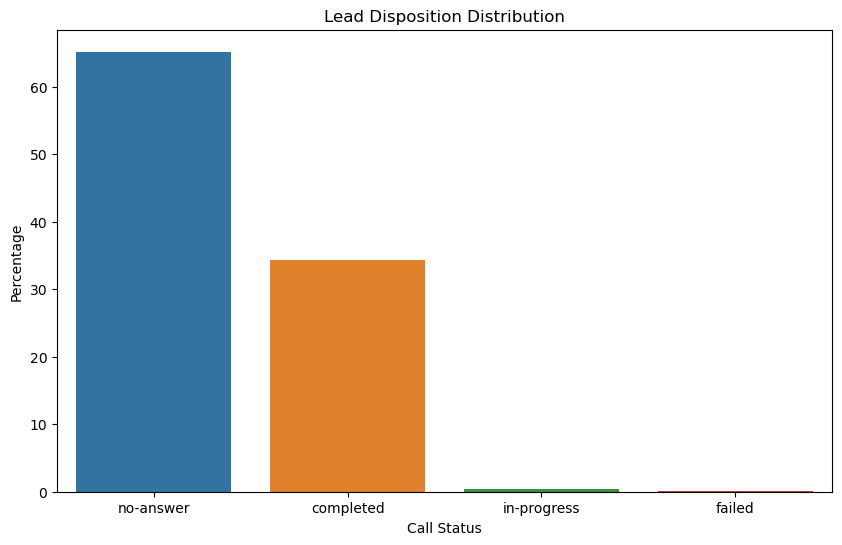

In [38]:
def lead_disposition_report(data):
    lead_status_distribution = data['Call Status'].value_counts(normalize=True) * 100
    return lead_status_distribution

disposition_report = lead_disposition_report(data)
print(disposition_report)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=disposition_report.index, y=disposition_report.values)
plt.title('Lead Disposition Distribution')
plt.xlabel('Call Status')
plt.ylabel('Percentage')
plt.show()

Lead Status
No Answer                 26.308736
Not Interested            19.965073
Busy                      15.201235
Interested                14.015352
Not Reachable              5.860374
Voice Issue                4.905982
Invalid Number             3.188076
Language Barrier           2.668237
Bought Another Product     1.945336
Call Back                  1.835682
Already Bought             1.380823
Already Verified           0.974698
Opt Out                    0.434553
Already Buy/ Bought        0.353328
Failed                     0.328961
Out of Geo Location        0.235552
Not Eligible - Income      0.215246
Not Eligible - Age         0.064980
Hung-up                    0.040612
Duplicate                  0.036551
Status26                   0.036551
Ringing                    0.004061
Name: proportion, dtype: float64


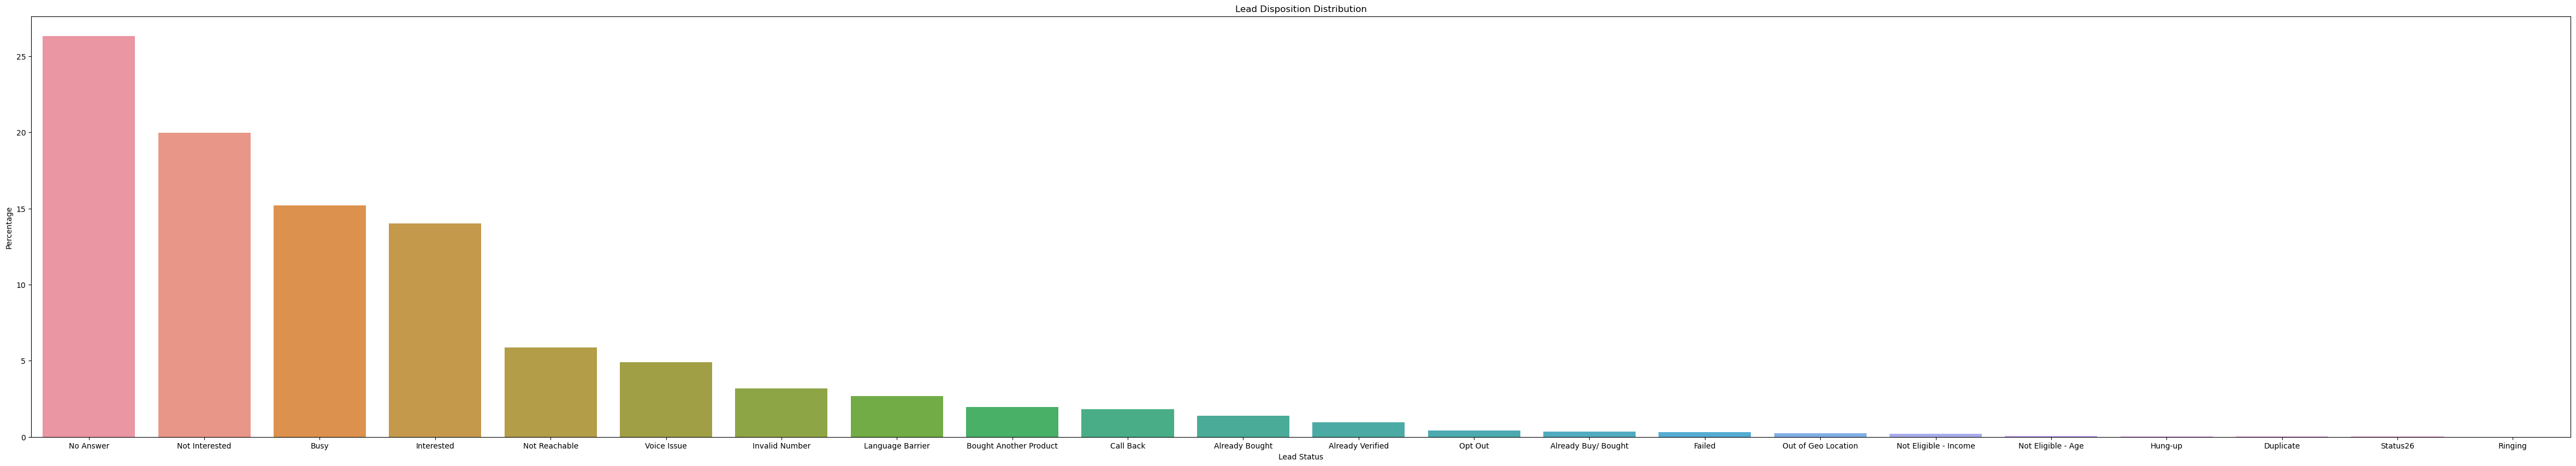

In [39]:
def lead_disposition_report(data):
    lead_status_distribution = data['Lead Status'].value_counts(normalize=True) * 100
    return lead_status_distribution

disposition_report = lead_disposition_report(data)
print(disposition_report)

# Plotting
plt.figure(figsize=(60, 10))
sns.barplot(x=disposition_report.index, y=disposition_report.values)
plt.title('Lead Disposition Distribution')
plt.xlabel('Lead Status')
plt.ylabel('Percentage')
plt.show()

## Agent Performance Report

In [40]:
def agent_performance_report(data):
    report = data.groupby('Agent Id').agg(
        Number_of_Calls=('Call Id', 'count'),
        Calls_Connected=('Call Id', lambda x: (data.loc[x.index, 'Call Status'] == 'completed').sum()),
        Leads_Converted=('Call Id', lambda x: (data.loc[x.index, 'Lead Status'] == 'Interested').sum()),
        Average_Agent_Call_Duration=('Agent Duration(seconds)', 'mean'),
        Average_Customer_Call_Duration=('Customer Duration(seconds)', 'mean')
    )
    return report

agent_report = agent_performance_report(data)
print(agent_report)


          Number_of_Calls  Calls_Connected  Leads_Converted  \
Agent Id                                                      
1                       4                2                0   
779                    27               11                4   
1656                    1                0                0   
2707                  104               15               15   
2714                 2453              916              374   
2728                 4134             1553              699   
2771                 4372             1491              685   
2772                 2930              998              315   
2778                  659              238               99   
2780                  999              201              117   
2783                 1147              434              142   
2784                   57               20                5   
2787                  572              215               69   
2790                  750              247             

0 Number_of_Calls
1 Calls_Connected
2 Leads_Converted
3 Average_Agent_Call_Duration
4 Average_Customer_Call_Duration


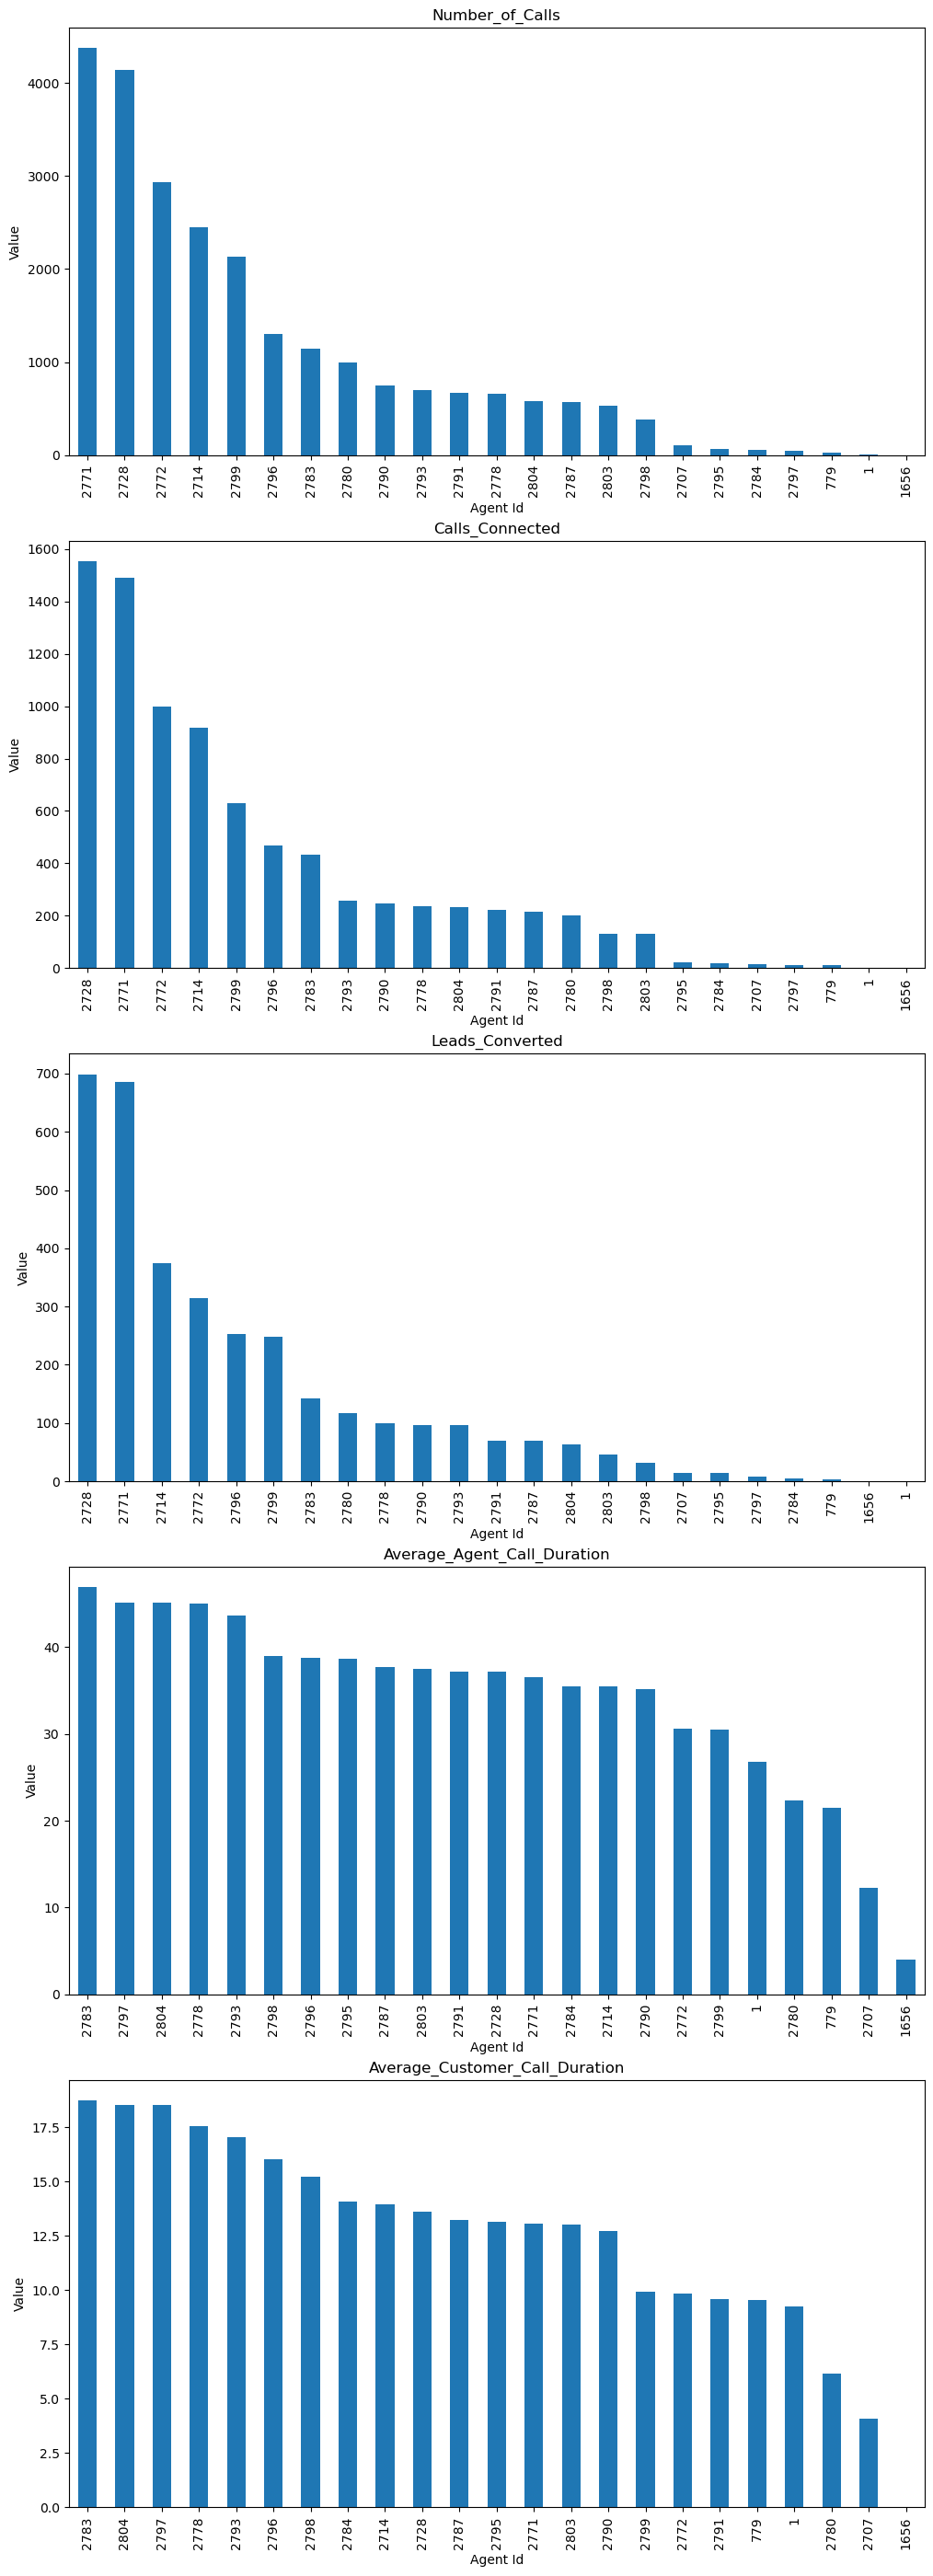

In [41]:
def plot_agent_performance_report(report):
    # Create a bar plot for each column
    fig, axs = plt.subplots(len(report.columns), 1, figsize=(12, 35))
    for i, col in enumerate(report.columns):
        print(i, col)
        sorted_report = report.sort_values(by=col, ascending=False)
        sorted_report[col].plot(kind='bar', ax=axs[i],)
        axs[i].set_title(col)
        axs[i].set_xlabel('Agent Id')
        axs[i].set_ylabel('Value')

    plt.show()

plot_agent_performance_report(agent_report)

# Forecasting

## Call Volume Forecast

c:\Users\asfaa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\asfaa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\asfaa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\asfaa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\asfaa\a

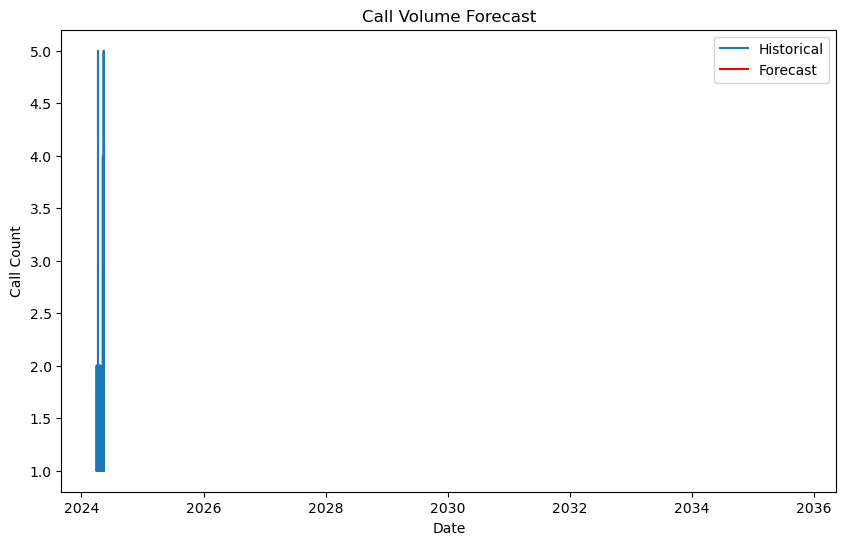

24028    1.0
dtype: float64

In [42]:
def call_volume_forecast(data):
    call_data = data.groupby('Created At').size().reset_index(name='Attempt No')
    call_data['Created At'] = pd.to_datetime(call_data['Created At'])
    call_data.set_index('Created At', inplace=True)
    
    model = ARIMA(call_data['Attempt No'], order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(call_data['Attempt No'], label='Historical')
    plt.plot(forecast, label='Forecast', color='red')
    plt.title('Call Volume Forecast')
    plt.xlabel('Date')
    plt.ylabel('Call Count')
    plt.legend()
    plt.show()
    
    return forecast

call_volume_forecast(data)


## Lead Conversion Forecast

In [43]:
def lead_conversion_forecast(data):
    lead_data = data.groupby('Created At').apply(lambda x: (x['Lead Status'] == 'Interested').sum()).reset_index(name='conversion_count')
    lead_data['Created At'] = pd.to_datetime(lead_data['Created At'])
    # lead_data.set_index('Created At', inplace=True)
    
    print(lead_data)
    
    model = ARIMA(lead_data['conversion_count'], order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(start=lead_data.index.max())
    
    plt.figure(figsize=(10, 6))
    plt.plot(lead_data['conversion_count'], label='Historical')
    plt.plot(forecast, label='Forecast', color='red')
    plt.title('Lead Conversion Forecast')
    plt.xlabel('Date')
    plt.ylabel('Conversion Count')
    plt.legend()
    plt.show()
    
    return forecast

lead_conversion_forecast(data)


               Created At  conversion_count
0     2024-04-01 11:35:19                 0
1     2024-04-01 11:35:27                 0
2     2024-04-01 11:36:19                 0
3     2024-04-01 11:36:29                 0
4     2024-04-01 11:37:14                 0
...                   ...               ...
24023 2024-05-15 19:18:00                 0
24024 2024-05-15 19:18:30                 0
24025 2024-05-15 19:19:09                 0
24026 2024-05-15 19:20:28                 0
24027 2024-05-15 19:20:45                 0

[24028 rows x 2 columns]


TypeError: statsmodels.tsa.statespace.mlemodel.MLEResults.predict() got multiple values for keyword argument 'start'